In [1]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")


In [11]:
# Cell 2: Example behavioral sequence (this is where real data would go! We have transformed behaviors into 1, 2, 3s)
# Syllable data from MoSeq, etc.
syllables = [2, 1, 2, 3, 3, 1,2, 1, 2, 3, 2, 1, 3, 1]
n_states = max(syllables) + 1  # number of syllables

In [12]:
# Cell 3: Build transition matrix
transition_matrix = np.zeros((n_states, n_states))

for i in range(len(syllables)-1):
    current = syllables[i]
    next_state = syllables[i+1]
    transition_matrix[current, next_state] += 1

# Normalize rows to get probabilities
row_sums = transition_matrix.sum(axis=1, keepdims=True)
transition_matrix_normalized = np.divide(
    transition_matrix, row_sums,
    out=np.zeros_like(transition_matrix),
    where=row_sums != 0
)

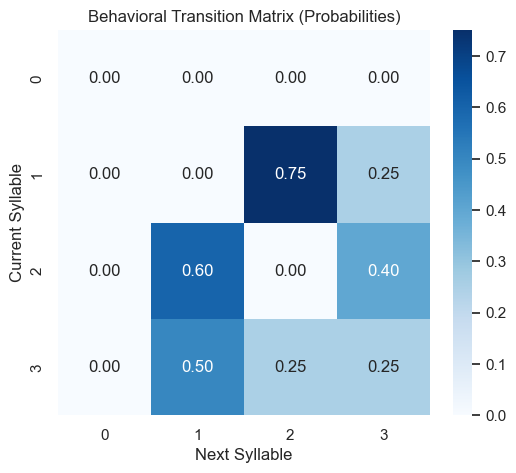

In [13]:
# Cell 4: Visualize transition matrix
plt.figure(figsize=(6, 5))
sns.heatmap(transition_matrix_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=range(n_states), yticklabels=range(n_states))
plt.title("Behavioral Transition Matrix (Probabilities)")
plt.xlabel("Next Syllable")
plt.ylabel("Current Syllable")
plt.show()


In [14]:
!pip install networkx

Transition Counts with Behavior Labels:
From Walking to Walking: Count=1, Prob=0.20
From Walking to Running: Count=2, Prob=0.40
From Walking to Jogging: Count=2, Prob=0.40
From Running to Walking: Count=2, Prob=0.40
From Running to Running: Count=1, Prob=0.20
From Running to Jogging: Count=2, Prob=0.40
From Jogging to Walking: Count=1, Prob=0.25
From Jogging to Running: Count=2, Prob=0.50
From Jogging to Jogging: Count=1, Prob=0.25


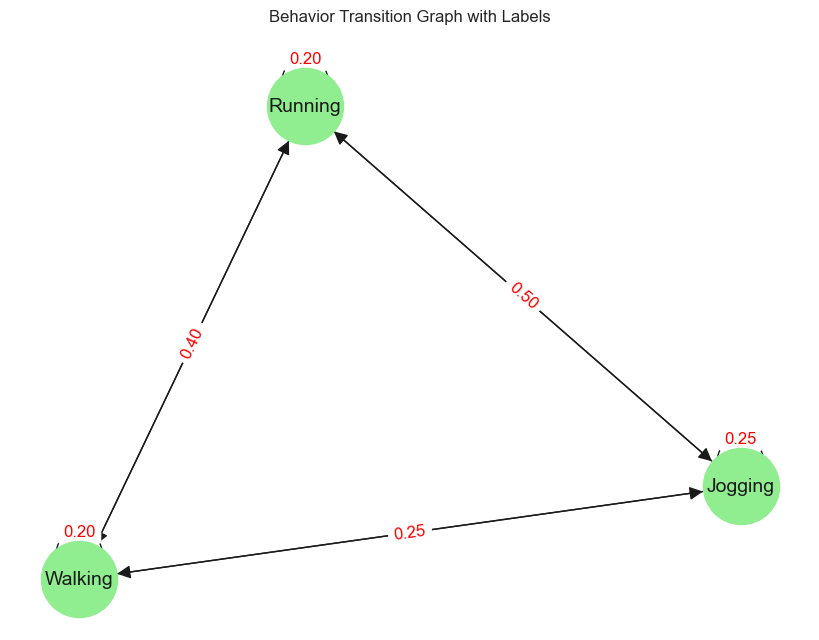

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Sample sequence of states
syllables = [1, 2, 3, 2, 3, 3, 1, 2, 1, 3, 2, 2, 1, 1, 3]    
n_states = max(syllables)

# Assign behaviors randomly or fixed for simplicity
behavior_labels = {
    1: "Walking",
    2: "Running",
    3: "Jogging",
    4: "skipping"
}

# Build raw transition matrix
transition_matrix = np.zeros((n_states, n_states), dtype=int)
for (a, b) in zip(syllables[:-1], syllables[1:]):
    transition_matrix[a-1][b-1] += 1

# Normalize to get transition probabilities
row_sums = transition_matrix.sum(axis=1, keepdims=True)
transition_probs = np.divide(
    transition_matrix,
    row_sums,
    out=np.zeros_like(transition_matrix, dtype=float),
    where=row_sums != 0
)

# Print transitions with behavior labels
print("Transition Counts with Behavior Labels:")
for i in range(n_states):
    for j in range(n_states):
        print(f"From {behavior_labels[i+1]} to {behavior_labels[j+1]}: Count={transition_matrix[i][j]}, Prob={transition_probs[i][j]:.2f}")

# Create directed graph with labels
G = nx.DiGraph()
for i in range(n_states):
    for j in range(n_states):
        weight = transition_probs[i][j]
        if weight > 0.01:  # filter small weights
            G.add_edge(behavior_labels[i+1], behavior_labels[j+1], weight=weight)

# Layout and edge labels
pos = nx.spring_layout(G, seed=42)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}

# Draw the graph
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=14, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
plt.title("Behavior Transition Graph with Labels")
plt.show()
